![car](OPENING.png)

# Business Understanding
Insurance companies invest a lot of time and money into optimizing their pricing and accurately estimating the likelihood that customers will make a [claim](https://insuranceblog.accenture.com/exploring-artificial-intelligence-for-insurance). In many countries insurance it is a legal requirement to have car insurance in order to drive a vehicle on public roads, so the market is very large!

Knowing all of this, On the Road car insurance have requested your services in building a model to predict whether a customer will make a claim on their insurance during the policy period. As they have very little expertise and infrastructure for deploying and monitoring machine learning models, they've asked you to identify the  best performing model, as measured by accuracy, so they can start with the model in production.

They have supplied you with their customer data as a csv file called `car_insurance.csv`, along with a table detailing the column names and descriptions below.



## The dataset

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-15</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>0-9</li><li>10-19</li><li>20-29</li><li>30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: High School</li><li>`1`: No education</li><li>University</li></ul> |
| `income` | Client's income level: <br> <ul><li>Poverty</li><li>Working class</li><li>Middle class</li><li>Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>Before 2015</li><li>2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>Sedan</li><li>Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

In [2]:
# Modules to handle table-like data and matrices
import pandas as pd
import numpy as np

# Modelling Algorithms Modules
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Modelling Helpers Modules
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder


# Visualization Modules
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
cars = pd.read_csv('car_insurance.csv')
cars.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

# Data Understanding

Check the balance between outcome

`1` : claims made, `0` : no claims 

<Axes: xlabel='outcome', ylabel='count'>

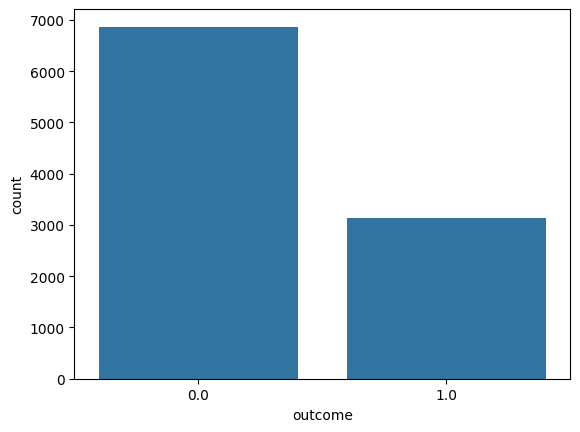

In [5]:
sns.countplot(x='outcome', data=cars)

Check the presence and distribution of outliers using boxplot 

<Axes: xlabel='outcome', ylabel='annual_mileage'>

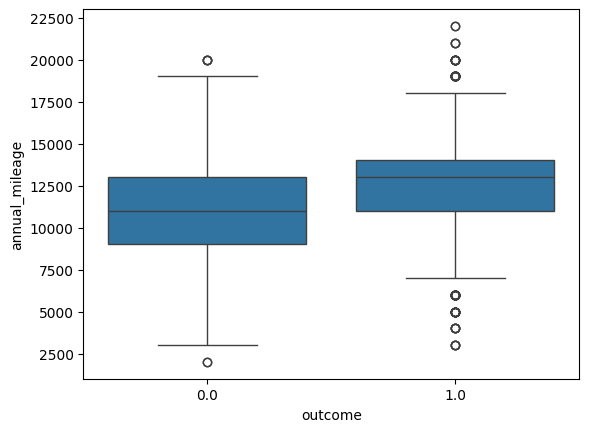

In [6]:
sns.boxplot(x='outcome', y='annual_mileage', data=cars)

<Axes: xlabel='credit_score', ylabel='Count'>

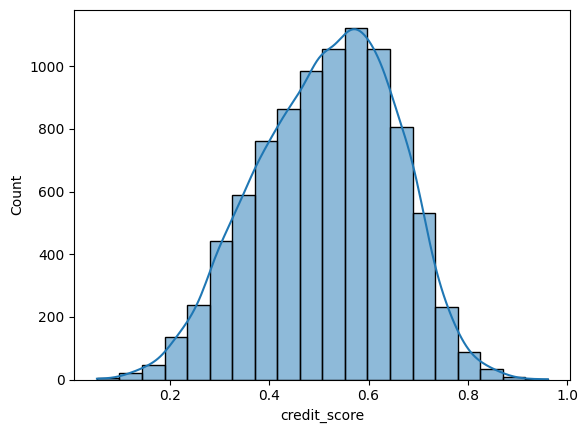

In [7]:
sns.histplot(cars['credit_score'], bins=20, kde=True)

<Axes: xlabel='annual_mileage', ylabel='Count'>

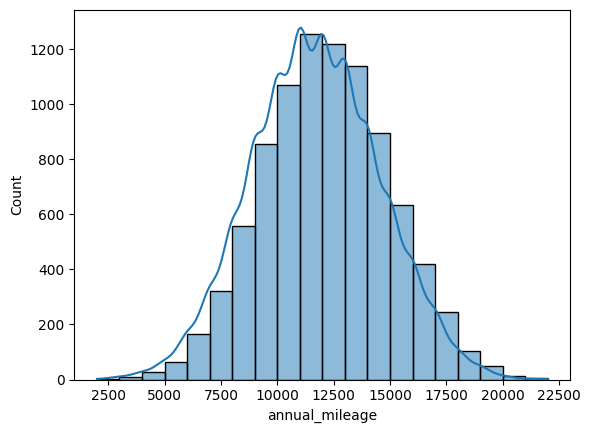

In [8]:
sns.histplot(cars['annual_mileage'], bins=20, kde=True)

In [9]:
numeric_cars.head()

NameError: name 'numeric_cars' is not defined

In [ ]:
correlation

,id,age,gender,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,outcome
id,1.000000,0.013512,-0.007343,0.001704,0.009197,0.014826,0.001233,0.006038,-0.002217,0.008156,0.009268,0.001831,-0.010506
age,0.013512,1.000000,0.005929,0.495495,0.272140,0.384759,0.383708,0.008553,-0.278073,0.458413,0.281937,0.431061,-0.448463
gender,-0.007343,0.005929,1.000000,-0.081587,0.007385,0.008393,-0.002640,-0.001996,-0.015845,0.202095,0.094202,0.223202,0.107208
credit_score,0.001704,0.495495,-0.081587,1.000000,0.312037,0.281238,0.220658,0.009040,-0.174453,0.204542,0.127366,0.180978,-0.325286
vehicle_ownership,0.009197,0.272140,0.007385,0.312037,1.000000,0.175626,0.125990,-0.004866,-0.097433,0.133868,0.086567,0.119521,-0.378921
married,0.014826,0.384759,0.008393,0.281238,0.175626,1.000000,0.287009,0.012045,-0.462193,0.218855,0.120840,0.215269,-0.262104
children,0.001233,0.383708,-0.002640,0.220658,0.125990,0.287009,1.000000,0.020911,-0.447655,0.220415,0.115354,0.206295,-0.232835
postal_code,0.006038,0.008553,-0.001996,0.009040,-0.004866,0.012045,0.020911,1.000000,-0.133978,0.113686,0.038492,-0.116985,0.095889
annual_mileage,-0.002217,-0.278073,-0.015845,-0.174453,-0.097433,-0.462193,-0.447655,-0.133978,1.000000,-0.323547,-0.116598,-0.195217,0.187154
speeding_violations,0.008156,0.458413,0.202095,0.204542,0.133868,0.218855,0.220415,0.113686,-0.323547,1.000000,0.359838,0.443074,-0.291862


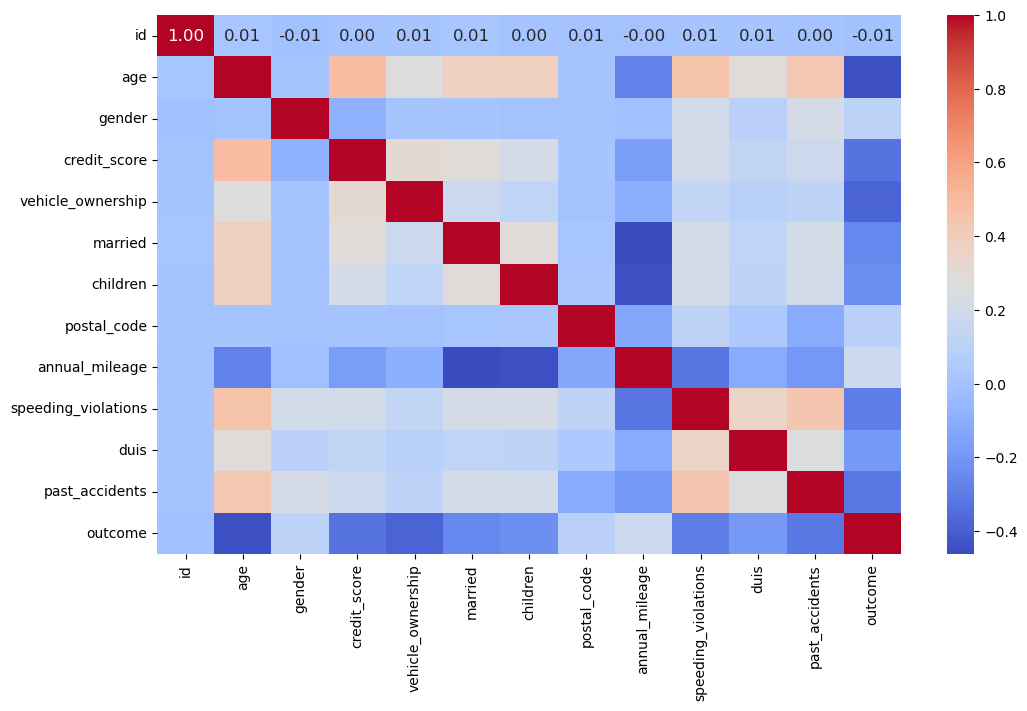

In [ ]:
numeric_cars = cars.select_dtypes(include=[np.number])
correlation = numeric_cars.corr()
plt.figure(figsize=(12,7))
sns.heatmap(correlation, fmt='.2f', annot=True, annot_kws={'size':12}, cmap='coolwarm')
plt.show()

# Data Preparation

handle missing value with mean function

In [ ]:
cars['credit_score'].fillna(cars['credit_score'].mean(), inplace = True)
cars['annual_mileage'].fillna(cars['annual_mileage'].mean(), inplace = True)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         10000 non-null  float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       10000 non-null  float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

Handle outliers in the annual_mileage column using RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
cars['annual_mileage_scaled'] = scaler.fit_transform(cars[['annual_mileage']])
cars.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome,annual_mileage_scaled
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0,0.100999
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0,1.434332
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0,-0.232334
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0,-0.232334
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0,0.100999


Create a funvtion to encode categorical columns using LabelEncoder

In [ ]:
def columns_le(data, columns):
    le = LabelEncoder()
    for column in columns:
        data[f'{column}_encoded'] = le.fit_transform(data[column]) # encode the column 
        data.drop(column, axis = 1, inplace=True) # drop the previous column
    return data

In [ ]:
columns_to_encode = ['driving_experience', 'education', 'income', 'vehicle_year', 'vehicle_type']
encoded_cars = columns_le(cars, columns_to_encode)
encoded_cars.drop('annual_mileage', axis=1, inplace=True)
encoded_cars.head()

,id,age,gender,credit_score,vehicle_ownership,married,children,postal_code,speeding_violations,duis,past_accidents,outcome,annual_mileage_scaled,driving_experience_encoded,education_encoded,income_encoded,vehicle_year_encoded,vehicle_type_encoded
0,569520,3,0,0.629027,1.0,0.0,1.0,10238,0,0,0,0.0,0.100999,0,0,2,0,0
1,750365,0,1,0.357757,0.0,0.0,0.0,10238,0,0,0,1.0,1.434332,0,1,1,1,0
2,199901,0,0,0.493146,1.0,0.0,0.0,10238,0,0,0,0.0,-0.232334,0,0,3,1,0
3,478866,0,1,0.206013,1.0,0.0,1.0,32765,0,0,0,0.0,-0.232334,0,2,3,1,0
4,731664,1,1,0.388366,1.0,0.0,0.0,32765,2,0,1,1.0,0.100999,1,1,3,1,0


| Column After Label Encoder | Description |
|--------|-------------|
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0` : 0-9</li><li>`1` : 10-19</li><li>`2` : 20-29</li><li>`3` : 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: High School</li><li>`1`: No education</li><li>`2` : University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`1` : Poverty</li><li>`3` : Working class</li><li>`0` : Middle class</li><li>`2` : Upper class</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`1` : Before 2015</li><li>`0` : 2015 or later</li></ul> |
| `vehicle_type` | Type of car: <br> <ul><li>`1` : Sedan</li><li>`0` : Sports car</li></ul> |

In [ ]:
encoded_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          10000 non-null  int64  
 1   age                         10000 non-null  int64  
 2   gender                      10000 non-null  int64  
 3   credit_score                10000 non-null  float64
 4   vehicle_ownership           10000 non-null  float64
 5   married                     10000 non-null  float64
 6   children                    10000 non-null  float64
 7   postal_code                 10000 non-null  int64  
 8   speeding_violations         10000 non-null  int64  
 9   duis                        10000 non-null  int64  
 10  past_accidents              10000 non-null  int64  
 11  outcome                     10000 non-null  float64
 12  annual_mileage_scaled       10000 non-null  float64
 13  driving_experience_encoded  1000

# Modelling
## Using Support Vector Machine, Random Forest, Logistic Regression

In [ ]:
X = encoded_cars.drop(['outcome', 'id'], axis=1)
y = encoded_cars['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=9)

Performing Hyperparameter tuning using GridSearch to find the best paramaters and model.

In [ ]:
model_params = {
    'svc': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20]
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

# Evaluation

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv = 5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

In [ ]:
df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df

,model,best_score,best_params,best_estimator,best_index
0,svc,0.848000,{'C': 1},"SVC(C=1, gamma='auto')",0
1,random_forest,0.823125,{'n_estimators': 10},"(DecisionTreeClassifier(max_features='sqrt', r...",2
2,logistic_regression,0.820625,{'C': 1},"LogisticRegression(C=1, solver='liblinear')",0


Build a simple prediction system

using the first row index where id is `569520` and the outcome is `0` : no claims

In [ ]:
encoded_cars.head()

,id,age,gender,credit_score,vehicle_ownership,married,children,postal_code,speeding_violations,duis,past_accidents,outcome,annual_mileage_scaled,driving_experience_encoded,education_encoded,income_encoded,vehicle_year_encoded,vehicle_type_encoded
0,569520,3,0,0.629027,1.0,0.0,1.0,10238,0,0,0,0.0,0.100999,0,0,2,0,0
1,750365,0,1,0.357757,0.0,0.0,0.0,10238,0,0,0,1.0,1.434332,0,1,1,1,0
2,199901,0,0,0.493146,1.0,0.0,0.0,10238,0,0,0,0.0,-0.232334,0,0,3,1,0
3,478866,0,1,0.206013,1.0,0.0,1.0,32765,0,0,0,0.0,-0.232334,0,2,3,1,0
4,731664,1,1,0.388366,1.0,0.0,0.0,32765,2,0,1,1.0,0.100999,1,1,3,1,0


In [ ]:
input_data = (3, 0, 0.629027, 1.0, 0.0, 1.0, 10238, 12000.0, 0, 0, 0, 0, 0, 2, 0, 0)

svc = SVC(C=1, gamma='auto')

input_array = np.asarray(input_data)

input_reshaped = input_array.reshape(1,-1)

svc.fit(X_train, y_train)

prediction = svc.predict(input_reshaped)
print(prediction)

[0.]


C:\Users\Aryo Sasi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# Conclusion

The purpose of this project is to build a model that predicts whether a customer will make an insurance claim. After testing several models, the best-performing one was the Support Vector Machine with a parameter C of 1, which achieved the highest accuracy of 84% in predicting customer insurance claim submissions. In testing simple predictions, the model also correctly predicted `No Claims` for the first row.

![aryo](CLOSING.png)